# Power Spectrum 
## Calculate the power spectrum using a 3D grid
Generate a the density field of the galaxy positions using a 3D grid
Using the 3D grid, then calculate the power spectrum using the powerbox package

In [1]:
# Power Spectrum plot
import matplotlib.pyplot as plt
import numpy as np
import powerbox as pbox
from Functions import *
from mpl_toolkits import mplot3d
from powerbox import get_power
from scipy import stats
import statistics
import pandas as pd

# Redshift = 0 
#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)
#ngals = len(gals)
#print(ngals)
#gals.columns #returns all avaiable properties of galxies
#gals[gals.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]# remove infs
#gals.dropna()# drop nan values

# See other available Snaps and Redshifts
reds = snaplist[1]
snaps = snaplist[0]
print(reds)
print(snaps)

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int
gals.columns #returns all avaiable properties of galxies

#sim_props # returns sim props if you want to check

[4.9999988  4.01575197 2.99733298 2.00100053 1.50871276 0.99933302
 0.50100094 0.        ]
[100 115 134 158 173 192 216 250]


Index(['HaloID', 'ID', 'Type', 'CentralGal', 'GhostFlag', 'Len', 'MaxLen',
       'Spin', 'Mvir', 'Rvir', 'Vvir', 'Vmax', 'FOFMvir', 'HotGas',
       'MetalsHotGas', 'ColdGas', 'MetalsColdGas', 'H2Frac', 'H2Mass',
       'HIMass', 'Mcool', 'DiskScaleLength', 'StellarMass', 'GrossStellarMass',
       'MetalsStellarMass', 'Sfr', 'EjectedGas', 'MetalsEjectedGas',
       'BlackHoleMass', 'Rcool', 'Cos_Inc', 'MergTime', 'MergerStartRadius',
       'BaryonFracModifier', 'FOFMvirModifier', 'MvirCrit', 'MergerBurstMass',
       'MWMSA', 'Fesc', 'FescWeightedGSM', 'FescBH', 'BHemissivity',
       'EffectiveBHM', 'BlackHoleAccretedHotMass', 'BlackHoleAccretedColdMass',
       'dt', 'Pos_0', 'Pos_1', 'Pos_2', 'Vel_0', 'Vel_1', 'Vel_2',
       'NewStars_0', 'NewStars_1', 'NewStars_2', 'NewStars_3', 'NewStars_4'],
      dtype='object')

In [13]:
fname_in = "imapping_testrun/meraxes.hdf5"
units = meraxes.read_units(fname_in)
print('\nunits\n=====')
for k, v in units.items():
    if not isinstance(v, dict):
        print(k, ':', v.decode('utf-8'))
        print()


units
=====
BHemissivity : 1e60 photons

BaryonFracModifier : None

BlackHoleAccretedColdMass : 1e10 solMass

BlackHoleAccretedHotMass : 1e10 solMass

BlackHoleMass : 1e10 solMass

CentralGal : None

ColdGas : 1e10 solMass

Cos_Inc : None

DiskScaleLength : Mpc

EffectiveBHM : 1e10 solMass

EjectedGas : 1e10 solMass

FOFMvir : 1e10 solMass

FOFMvirModifier : None

Fesc : None

FescBH : None

FescWeightedGSM : 1e10 solMass

GhostFlag : None

GrossStellarMass : 1e10 solMass

H2Frac : None

H2Mass : 1e10 solMass

HIMass : 1e10 solMass

HaloID : None

HotGas : 1e10 solMass

ID : None

Len : None

MWMSA : Myr

MaxLen : None

Mcool : 1e10 solMass

MergTime : Myr

MergerBurstMass : 1e10 solMass

MergerStartRadius : Mpc

MetalsColdGas : 1e10 solMass

MetalsEjectedGas : 1e10 solMass

MetalsHotGas : 1e10 solMass

MetalsStellarMass : 1e10 solMass

Mvir : 1e10 solMass

MvirCrit : 1e10 solMass

NewStars : 1e10 solMass

Pos : Mpc

Rcool : Mpc

Rvir : Mpc

Sfr : solMass/yr

Spin : None

StellarMass 

In [2]:
Type = gals["Type"]
# All Galaxies = gals
# Centrals = gals[Type==0]
Cen_gals = gals[Type==0]
# Satellites = gals[Type==1]
Sat_gals= gals[Type==1]
# Orphans = gals[Type==2]
Orp_gals = gals[Type==2]

# GALAXY POSITIONS

In [3]:
# All
# using positions [x,y,x]
pos_x, pos_y, pos_z, Pos, Pos_new = return_3d_pos(gals)
# Centrals
Cen_pos_x, Cen_pos_y, Cen_pos_z, Cen_Pos, Cen_Pos_new = return_3d_pos(Cen_gals)
# Satellites
Sat_pos_x, Sat_pos_y, Sat_pos_z, Sat_Pos, Sat_Pos_new = return_3d_pos(Sat_gals)
# Orphans
Orp_pos_x, Orp_pos_y, Orp_pos_z, Orp_Pos, Orp_Pos_new = return_3d_pos(Orp_gals)

# HI MASS

# All
HIMass = gals["HIMass"]
# Centrals
Cen_HIMass = Cen_gals["HIMass"]
# Satellites
Sat_HIMass = Sat_gals["HIMass"]
# Orphans
Orp_HIMass = Orp_gals["HIMass"]

# HALO MASS

# All
Mvir = gals["Mvir"]
# Centrals
Cen_Mvir = Cen_gals["Mvir"]
# Satellites
Sat_Mvir = Sat_gals["Mvir"]
# Orphans
Orp_Mvir = Orp_gals["Mvir"]

## use this if 1st attempt doesnt work
### MAKE 3D array for grid later
#HIMass = np.array([HIMass, HIMass, HIMass])
#HIMass.T.shape
#HIMass_new=HIMass.T # Transpose the HIMass so it is in format (N,D) array

## Create 3D grid of galaxy positions
### 1. Calculate the edges of the grid
### 2. Calculate the deltax
    delta x = (Pos/edges)
### 3. Get the 3D grid
    using histogram 3D

In [4]:
# getting bits ready for 3D grid 
boxsize = 178.57142857142858 # get the box size, this is from sims pops 
dim = len(Pos) # number of dimensions in 3D space =3
boxlength = [boxsize] * dim #get box length for each side of box
N = pos_x.shape # = 1648367
V = np.product(boxlength)

# Create 3D grid for 
## 1. Galaxy positions ($\rho_{x}$)

In [5]:
# Histogramdd = RETURNS GALAXY COUNTS (rhox) and bins
nbins=100 

# All
rhox, edges = np.histogramdd(Pos_new, bins=nbins)# calculate the 3D grid using histogramdd 
# Centrals
Cen_rhox, Cen_edges = np.histogramdd(Cen_Pos_new, bins=nbins)
Sat_rhox, Sat_edges = np.histogramdd(Sat_Pos_new, bins=nbins)
Orp_rhox, Orp_edges = np.histogramdd(Orp_Pos_new, bins=nbins)


## 2. HIMass $\rho_{HIMass}$

rhoHIMass, edgesHIMass = np.histogramdd(Pos_new, bins=nbins, weights=HIMass) #[0].astype("float") # calculate the 3D grid using histogramdd
Cen_rhoHIMass, Cen_edgesHIMass = np.histogramdd(Cen_Pos_new, bins=nbins, weights=Cen_HIMass) #[0].astype("float") # calculate the 3D grid using histogramdd
Sat_rhoHIMass, Sat_edgesHIMass = np.histogramdd(Sat_Pos_new, bins=nbins, weights=Sat_HIMass) #[0].astype("float") # calculate the 3D grid using histogramdd
Orp_rhoHIMass, Orp_edgesHIMass = np.histogramdd(Orp_Pos_new, bins=nbins, weights=Orp_HIMass) #[0].astype("float") # calculate the 3D grid using histogramdd

# Calculate the density using the mean of the density field:

$\delta = \frac{\rho(x)}{\bar{\rho(x)}}$

## Galaxies:

In [6]:
delta = rhox / np.mean(rhox) - 1 # calcualte the over density
Cen_delta = Cen_rhox / np.mean(Cen_rhox) - 1 # calcualte the over density
Sat_delta = Sat_rhox / np.mean(Sat_rhox) - 1 # calcualte the over density
Orp_delta = Orp_rhox / np.mean(Orp_rhox) - 1 # calcualte the over density

## HI Mass 

delta_HIMass = rhoHIMass / np.mean(rhoHIMass) - 1 # calculate the over density
Cen_delta_HIMass = Cen_rhoHIMass / np.mean(Cen_rhoHIMass) - 1 # calculate the over density
Sat_delta_HIMass = Sat_rhoHIMass / np.mean(Sat_rhoHIMass) - 1 # calculate the over density
Orp_delta_HIMass = Orp_rhoHIMass / np.mean(Orp_rhoHIMass) - 1 # calculate the over density

## 3. M VIR (HALO MASS)

rhoMvir, edgesMvir = np.histogramdd(Pos_new, bins=nbins, weights=Mvir) #[0].astype("float") # calculate the 3D grid using histogramdd
Cen_rhoMvir, Cen_edgesMvir = np.histogramdd(Cen_Pos_new, bins=nbins, weights=Cen_Mvir) #[0].astype("float") # calculate the 3D grid using histogramdd
Sat_rhoMvir, Sat_edgesMvir = np.histogramdd(Sat_Pos_new, bins=nbins, weights=Sat_Mvir) #[0].astype("float") # calculate the 3D grid using histogramdd
Orp_rhoMvir, Orp_edgesMvir = np.histogramdd(Orp_Pos_new, bins=nbins, weights=Orp_Mvir) #[0].astype("float") # calculate the 3D grid using histogramdd


delta_Mvir = rhoMvir / np.mean(rhoMvir) - 1 # calculate the over density
Cen_delta_Mvir = Cen_rhoMvir / np.mean(Cen_rhoMvir) - 1 # calculate the over density
Sat_delta_Mvir = Sat_rhoMvir / np.mean(Sat_rhoMvir) - 1 # calculate the over density
Orp_delta_Mvir = Orp_rhoMvir / np.mean(Orp_rhoMvir) - 1 # calculate the over density

## Now lets do the Galaxy and HI Mass Power Spectrum 
### The only difference is that we add weights (HI_Mass is the weights for the PS)

In [7]:
# REDSHIFT z=0
# GALAXY PS = gal_ps, gal_k
# HIMASS PS = HIMass_ps, HIMass_k
# All
gal_ps, gal_k = get_power(delta,boxlength,remove_shotnoise=False,weights=None)# NO WEIGHTS for GALAXY PS
#HIMass_ps, HIMass_k = pbox.get_power(delta_HIMass,boxlength,remove_shotnoise=False)# WEIGHTS = HIMASS for HIMASS PS
#Mvir_ps, Mvir_k = pbox.get_power(delta_Mvir,boxlength,remove_shotnoise=False)# WEIGHTS = HIMASS for HIMASS PS

# Centrals
Cen_gal_ps, Cen_gal_k = get_power(Cen_delta,boxlength,remove_shotnoise=False,weights=None)# NO WEIGHTS for GALAXY PS
# Satellites
Sat_gal_ps, Sat_gal_k = get_power(Sat_delta,boxlength,remove_shotnoise=False,weights=None)# NO WEIGHTS for GALAXY PS
# Orphans
Orp_gal_ps, Orp_gal_k = get_power(Orp_delta,boxlength,remove_shotnoise=False,weights=None)# NO WEIGHTS for GALAXY PS

# PLOT
## GALAXY PS

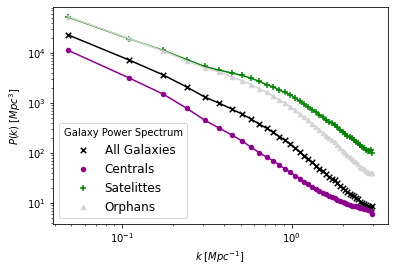

In [20]:
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
#ax.set_ylim([0,3500])
#ax.set_xlim([0.1,1])

# Labels and Legends
label_All = ("All Galaxies")
label_Cen = ("Centrals")
label_Sat = ("Satelittes")
label_Orp = ("Orphans")

# Plot
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')
ax.plot(gal_k,gal_ps,color="black")
ax.scatter(gal_k,gal_ps,color="black", label=label_All,marker="x", s=30)
ax.plot(Cen_gal_k,Cen_gal_ps,color='darkmagenta')
ax.scatter(Cen_gal_k,Cen_gal_ps,color='darkmagenta', label=label_Cen,marker="o", s=20)
ax.plot(Sat_gal_k,Sat_gal_ps,color='g')
ax.scatter(Sat_gal_k,Sat_gal_ps,color='g', label=label_Sat,marker="+", s=30)
ax.plot(Orp_gal_k,Orp_gal_ps,color="lightgray")
ax.scatter(Orp_gal_k,Orp_gal_ps,color="lightgray", label=label_Orp,marker="^", s=20)

plt.legend(title=("Galaxy Power Spectrum"),
           loc='lower left',
           fontsize=12)

# Name and save plot
nbins = str(nbins)
name_of_plot=("GalaxyPowerSpectrum_All_Cen_Sat_Orp_logged" + nbins)
plt.savefig("plots/" + name_of_plot + ".pdf")

# HI MASS PS

fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
#ax.set_ylim([0,3500])
#ax.set_xlim([0.1,1])
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P_{HI}(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')
ax.plot(bins_field_HI_Mass,p_k_field_HI_Mass,color="deepskyblue", label=label_z)

plt.legend(title=("DRAGONS"),
           loc='upper right',
           fontsize=12)

nbins = str(nbins)
name_of_plot=("PowerSpectrum_HIMass" + nbins)
plt.savefig("plots/" + name_of_plot + ".pdf")